# **LAB 9: Gale-Shapley and Irving Algorithms**

Daniel Ricardo Mendivelso Velandia

In [ ]:
%pylab inline
import pandas as pd
import numpy as np
from collections import Counter
import copy

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# 1. Find the best and worst cases for the Gale-Shapley and Irving ( An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40

In [ ]:
def obtener_lista_1_a_n(n):
  return list(range(0,n))

def obtener_lista_i_a_n(i,n):
  return list(range(i,n))

def men_pref_worst(n):
  matriz = []
  for i in range(0, n):
    corte1 = obtener_lista_i_a_n(i,n-1)
    corte2 = obtener_lista_1_a_n(i) + [n-1]
    fila = corte1 + corte2
    matriz.append(fila)
  return matriz

def women_pref_worst(n):
  matriz =[]
  for i in range(0,n):
    corte1 = obtener_lista_i_a_n(i+1,n)
    corte2 = obtener_lista_1_a_n(i+1)
    fila = corte1 + corte2
    matriz.append(fila)

  return matriz  

In [ ]:
def stable_marriage(menPreferr, womenPreferr, n):
  menPref = copy.deepcopy(menPreferr)
  womenPref = copy.deepcopy(womenPreferr)

  marriage = np.ones((n, 1)) * -1

  mensWithoutMarriage = [x for x in range(n)]
  proposals = 0
  days = 1
  while(len(mensWithoutMarriage)):
    man = mensWithoutMarriage.pop(0)
    casado = False
    while(menPref[man] and not casado):
      proposals += 1
      woman = menPref[man].pop(0)
      if(marriage[woman] == -1):
        marriage[woman] = man     
        casado = True
      else:
        nemesis = int(marriage[woman])
        for j in range(len(womenPref)):
          preferenceWoman = womenPref[woman][j]
          if(preferenceWoman == man):
            marriage[woman] = man
            mensWithoutMarriage.append(nemesis)
            casado = True           
            break
          if(preferenceWoman == nemesis):
            break

  # print(menPreferr)
  return marriage, proposals

# Best cases

Para el algoritmo de Gale-Shapley teoricamente el mejor caso da cuando el numero de propuestas es n

In [ ]:
def best_case(n):
  
  matriz =[]
  #Construir n filas
  for i in range(0,n):
    corte1 = obtener_lista_i_a_n(i,n)
    corte2 = obtener_lista_1_a_n(i)
    fila = corte1 + corte2
    matriz.append(fila)
  
  return matriz

In [ ]:
n = 4
Men_preferences = best_case(n)
Women_preferences = best_case(n)

print(Men_preferences)

print(Women_preferences)

marriage, steps = stable_marriage(Men_preferences, Women_preferences, n)
marriageCouples = [(x, int(marriage[x])) for x in range(n)]
print("Couples (Women, Men): ", marriageCouples)
print("Number of proposes: ", steps)

[[0, 1, 2, 3], [1, 2, 3, 0], [2, 3, 0, 1], [3, 0, 1, 2]]
[[0, 1, 2, 3], [1, 2, 3, 0], [2, 3, 0, 1], [3, 0, 1, 2]]
Couples (Women, Men):  [(0, 0), (1, 1), (2, 2), (3, 3)]
Number of proposes:  4


Como vemos el resultado para n = 4 es 4 la cual satisface la ecuación

In [ ]:
n = 40
Men_preferences = best_case(n)
Women_preferences = best_case(n)

print(Men_preferences)
print(Women_preferences)

marriage, steps = stable_marriage(Men_preferences, Women_preferences, n)
marriageCouples = [(x, int(marriage[x])) for x in range(n)]
print("Couples (Women, Men): ", marriageCouples)
print("Number of proposes: ", steps)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 0], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 0, 1], [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 0, 1, 2], [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 0, 1, 2, 3], [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 0, 1, 2, 3, 4], [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28

Como vemos el resultado para n = 40 es 40 la cual satisface la ecuación

# Worst cases

Para el algoritmo de Gale-Shapley teoricamente el peor caso da cuando el numero de propuestas es n(n-1)+1

In [ ]:
n = 4
Men_preferences = men_pref_worst(n)
Women_preferences = women_pref_worst(n)

print(Men_preferences)

print(Women_preferences)

marriage, steps = stable_marriage(Men_preferences, Women_preferences, n)
marriageCouples = [(x, int(marriage[x])) for x in range(n)]
print("Couples (Women, Men): ", marriageCouples)
print("Number of proposes: ", steps)


[[0, 1, 2, 3], [1, 2, 0, 3], [2, 0, 1, 3], [0, 1, 2, 3]]
[[1, 2, 3, 0], [2, 3, 0, 1], [3, 0, 1, 2], [0, 1, 2, 3]]
Couples (Women, Men):  [(0, 1), (1, 2), (2, 3), (3, 0)]
Number of proposes:  13


Como vemos el resultado para n = 4 es 13 la cual satisface la ecuación

In [ ]:
n = 40
Men_preferences = men_pref_worst(n)
Women_preferences = women_pref_worst(n)

print(Men_preferences)
print(Women_preferences)

marriage, steps = stable_marriage(Men_preferences, Women_preferences, n)
marriageCouples = [(x, int(marriage[x])) for x in range(n)]
print("Couples (Women, Men): ", marriageCouples)
print("Number of proposes: ", steps)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 0, 39], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 0, 1, 39], [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 0, 1, 2, 39], [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 0, 1, 2, 3, 39], [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 0, 1, 2, 3, 4, 39], [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28

Como vemos el resultado para n = 40 es 1561 la cual satisface la ecuación

# 2. Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations

In [ ]:
import string
from collections import Counter
from copy import copy

alphabet_string = string.ascii_uppercase
alphabet_string2 = string.ascii_lowercase
alphabet_list = list(alphabet_string)
alphabet_list2 = list(alphabet_string2)
a = []
a2 = []
for letter in alphabet_list:
  x = letter+letter
  a.append(x)
for letter in alphabet_list2:
  x = letter+letter
  a2.append(x)
myAlphabetWomen = alphabet_list + a
myAlphabetMen = alphabet_list2 + a2

In [ ]:
def gale_shapley(women_list, man_list, women_df,man_df):
  # dict to control which women each man can make proposals
  women_available = {man:women_list for man in man_list}
  # waiting list of men that were able to create pair on each iteration
  waiting_list = []
  # dict to store created pairs
  proposals = {}
  # variable to count number of iterations
  count = 0
  # while not all men have pairs
  while len(waiting_list)<len(man_list):
      # man makes proposals
      for man in man_list:
          if man not in waiting_list:
              # each man make proposal to the top women from it's list
              women = women_available[man]
              
              best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
              proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                  women_df.loc[man][best_choice])
      # if women have more than one proposals 
      # she will choose the best option
      overlays = Counter([key[1] for key in proposals.keys()])
      # cycle to choose the best options
      for women in overlays.keys():
          if overlays[women]>1:
              # pairs to drop from proposals
              pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                      if women in pair}.items(), 
                    key=lambda x: x[1][1]
                    )[1:]
              # if man was rejected by woman
              # there is no pint for him to make proposal 
              # second time to the same woman
              for p_to_drop in pairs_to_drop:
                  del proposals[p_to_drop[0]]
                  _women = copy(women_available[p_to_drop[0][0]])
                  _women.remove(p_to_drop[0][1])
                  women_available[p_to_drop[0][0]] = _women
      # man who successfully created pairs must be added to the waiting list 
      waiting_list = [man[0] for man in proposals.keys()]
      # update counter
      count+=1
  return count

In [ ]:
def run100times(n):
  women_list = myAlphabetWomen[0:n]
  men_list = myAlphabetMen[0:n]
  women_perms = []
  men_perms = []
  iterations = []
  wdict = {}
  mdict = {}
  for i in range(100):
    warr = []
    marr = []
    for k in range(n):
      warr.append(np.random.permutation(n) + 1)
      wdict[women_list[k]] = warr[k]      
      marr.append(np.random.permutation(n) + 1)
      mdict[women_list[k]] = warr[k]   
    
    women_df = pd.DataFrame(wdict)
    women_df.index = men_list
    
    df = pd.DataFrame(mdict)
    men_df = df.T
    men_df.columns = women_list
    men_df.index = men_list
    iterations.append(gale_shapley(women_list, men_list, women_df,men_df))
   
  return iterations

Mínimo:  1
Máximo:  6
Promedio:  2.95


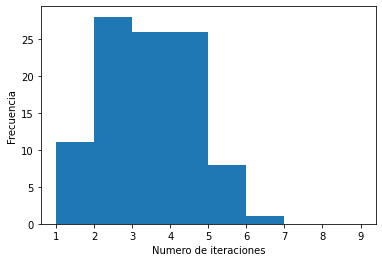

In [ ]:
n4 = run100times(4)
print("Mínimo: ", min(n4))
print("Máximo: ", max(n4))
print("Promedio: ", sum(n4)/len(n4))
plt.hist(n4,bins=[1,2,3,4,5,6,7,8,9])

plt.xlabel('Numero de iteraciones')
plt.ylabel('Frecuencia')
plt.show()

Mínimo:  11
Máximo:  151
Promedio:  54.53


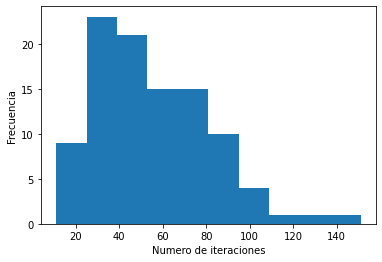

In [ ]:
n40 = run100times(40)
print("Mínimo: ", min(n40))
print("Máximo: ", max(n40))
print("Promedio: ", sum(n40)/len(n40))
plt.hist(n40)

plt.xlabel('Numero de iteraciones')
plt.ylabel('Frecuencia')
plt.show()